# Imports

In [40]:
from sklearn.linear_model import LogisticRegression
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Constants

In [41]:
DATASET = "fantasy_reasoning"
WEIGHT = "fantasy_reasoning"
MODEL_NAME = "gemma-2-2b"
DATA_DIR = f"./experimental_data/{MODEL_NAME}/{DATASET}/"
WEIGHTS_DIR = f"./weights/linear_analysis/{MODEL_NAME}/{WEIGHT}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Data

In [42]:
acts_exp_resid = torch.load(DATA_DIR + "acts_exp_resid.pt", map_location=device)
acts_resid = torch.load(DATA_DIR + "acts_resid.pt", map_location=device)

C:\Users\wsr20\AppData\Local\Temp\ipykernel_3892\96380757.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts_exp_resid = torch.load(DATA_DIR + "acts_exp_resid.pt", map

In [43]:
X_exp_resid = acts_exp_resid
X_resid = acts_resid
y_exp_resid = torch.ones(X_exp_resid.shape[0])
y_resid = torch.zeros(X_resid.shape[0])
X = torch.cat((X_exp_resid, X_resid), dim=0)
y = torch.cat((y_exp_resid, y_resid), dim=0)

# Load Classifiers

In [44]:
classifiers = [LogisticRegression(fit_intercept=False)] * acts_exp_resid.shape[1]
for layer in range(acts_exp_resid.shape[1]):
    weights = torch.load(WEIGHTS_DIR + f"layer_{layer}.pt", map_location=device).numpy()
    classifiers[layer].coef_ = weights
    classifiers[layer].intercept_ = 0
    classifiers[layer].classes_ = np.array([0, 1])

C:\Users\wsr20\AppData\Local\Temp\ipykernel_3892\1761057080.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(WEIGHTS_DIR + f"layer_{layer}.pt", map_l

# Perform Evaluation

In [45]:
accuracies = []
for i, classifier in enumerate(classifiers):
    y_pred = classifier.predict(X[:, i, :])
    print(f"layer {i}")
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy:", accuracy)
    accuracies.append(accuracy)
    
    conf_matrix = confusion_matrix(y, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    class_report = classification_report(y, y_pred)
    print("Classification Report:\n", class_report)
    
    print("\n")

layer 0
Accuracy: 0.9925373134328358
Confusion Matrix:
 [[198   3]
 [  0 201]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       201
         1.0       0.99      1.00      0.99       201

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402



layer 1
Accuracy: 0.9975124378109452
Confusion Matrix:
 [[200   1]
 [  0 201]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       201
         1.0       1.00      1.00      1.00       201

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



layer 2
Accuracy: 0.9975124378109452
Confusion Matrix:
 [[200   1]
 [  0 201]]
Classification Report:
               precision    recall

# Plot accuracy

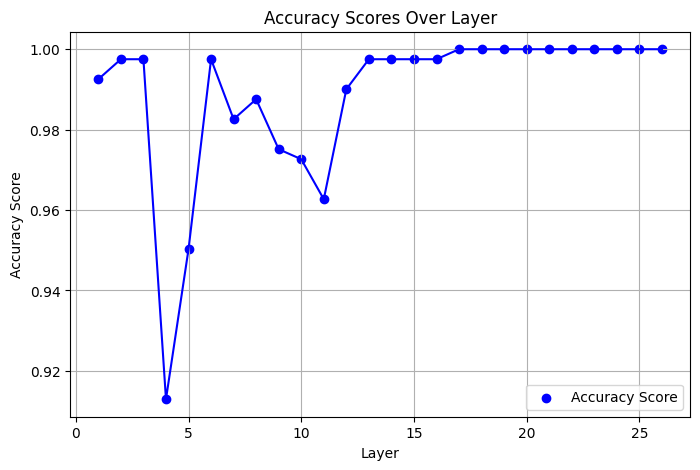

In [46]:
x_values = range(1, len(accuracies) + 1)
plt.figure(figsize=(8, 5))
plt.scatter(x_values, accuracies, color="blue", label="Accuracy Score")
plt.plot(x_values, accuracies, color="blue")

# Adding titles and labels
plt.title("Accuracy Scores Over Layer")
plt.xlabel("Layer")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.legend()
plt.savefig(f"./figs/{MODEL_NAME}/{WEIGHT}/{DATASET}_accuracy.png")
plt.show()